<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/Autoencoders_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

### simplest possible autoencoder

In [2]:
# This is the size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32  

# This is our input image
input_img = keras.Input(shape=(784,))

# single fully-connected neural layer as encoder and as decoder

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# Separate  encoder model

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# Separate decoder model

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
# configure model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# loads dataset and discards labels
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# normalizes data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# trains autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.3817 - val_loss: 0.1914
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1810 - val_loss: 0.1523
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1480 - val_loss: 0.1325
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1307 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1199 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1126 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1072 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1033 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1002 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0978 - val_loss: 0.0955

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

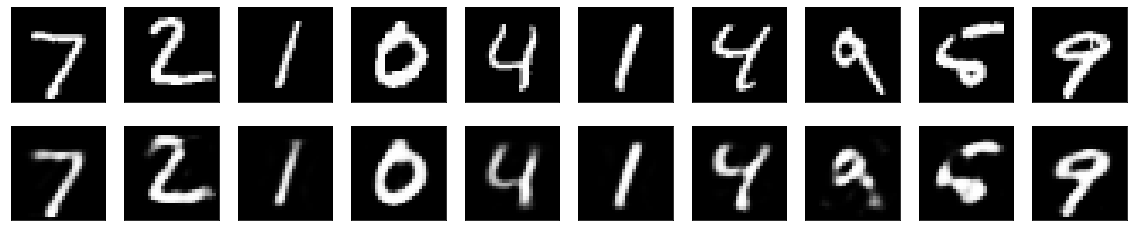

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Adding a sparsity constraint on the encoded representations


In [ ]:
from tensorflow.keras import regularizers

In [ ]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
# configure model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# loads dataset and discards labels
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# normalizes data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# trains autoencoder
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3926 - val_loss: 0.1971
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1868 - val_loss: 0.1604
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1565 - val_loss: 0.1423
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1406 - val_loss: 0.1308
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1304 - val_loss: 0.1227
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1227 - val_loss: 0.1169
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1171 - val_loss: 0.1129
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1133 - val_loss: 0.1102
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1109 - val_loss: 0.1084
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1090 - val_lo

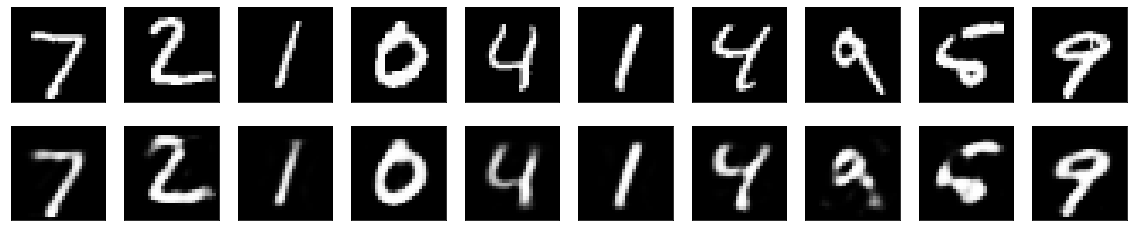

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep autoencoder

In [ ]:
# using a stack of layers instead of single layer
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3439 - val_loss: 0.1667
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1571 - val_loss: 0.1356
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1328 - val_loss: 0.1244
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1234 - val_loss: 0.1167
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1171 - val_loss: 0.1121
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1130 - val_loss: 0.1092
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1099 - val_loss: 0.1073
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1075 - val_loss: 0.1045
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1052 - val_loss: 0.1028
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1035 - val_lo

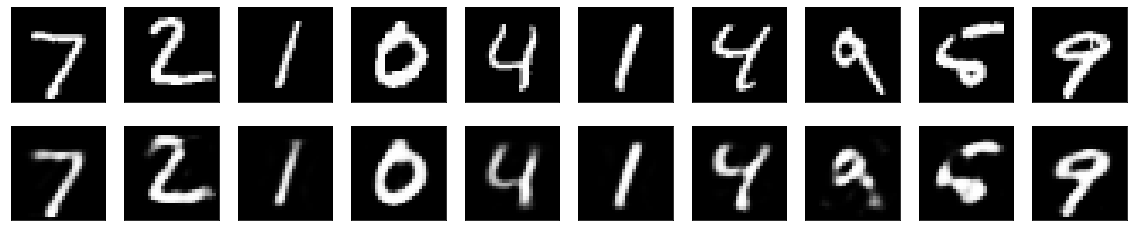

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

In [ ]:
# Uses CNNs as encoders and decoders
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 8s 6ms/step - loss: 0.3304 - val_loss: 0.1515
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1447 - val_loss: 0.1273
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1251 - val_loss: 0.1177
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1175 - val_loss: 0.1135
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1134 - val_loss: 0.1100
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1108 - val_loss: 0.1077
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1083 - val_loss: 0.1059
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1066 - val_loss: 0.1043
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1050 - val_loss: 0.1029
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1034 - val_loss: 0.1017

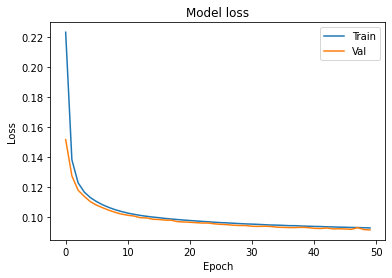

In [ ]:
# visualizes model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

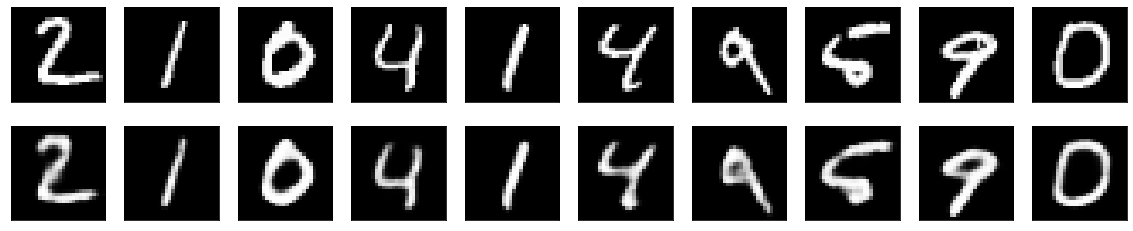

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

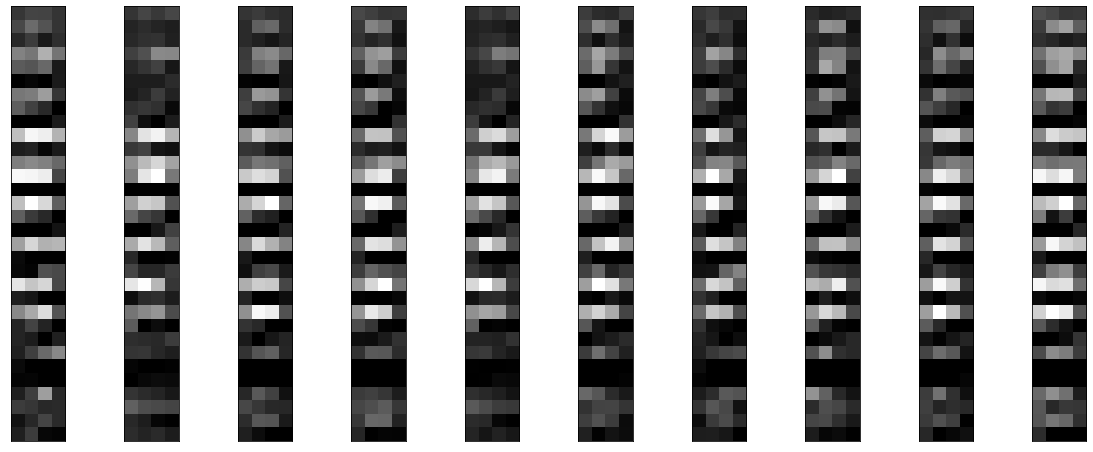

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Application to image denoising


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

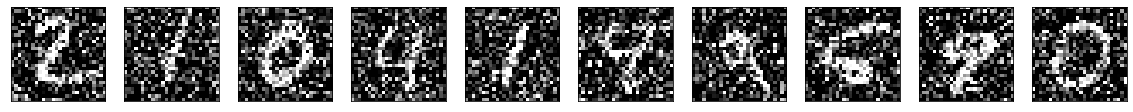

In [ ]:
# displays noisey images
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2494 - val_loss: 0.1164
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1150 - val_loss: 0.1086
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1087 - val_loss: 0.1050
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1054 - val_loss: 0.1026
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1033 - val_loss: 0.1009
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1016 - val_loss: 0.0999
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1005 - val_loss: 0.0989
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0997 - val_loss: 0.0982
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0988 - val_loss: 0.0976
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0984 - val_lo

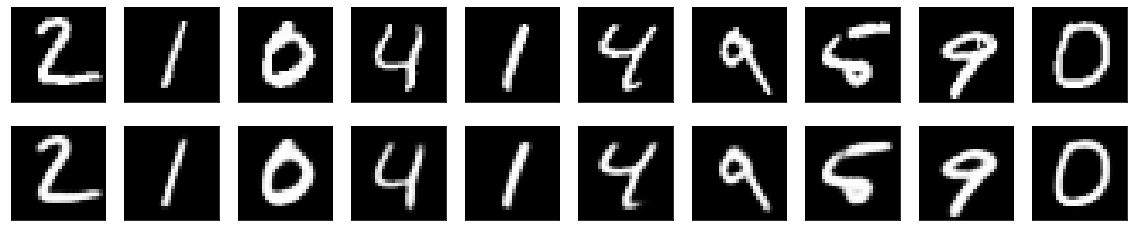

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Sequence-to-sequence autoencoder

In [ ]:
# for reference, not testable
timesteps = ...  # Length of your sequences
input_dim = ... 
latent_dim = ...

inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)

### Variational autoencoder (VAE)

In [6]:
# mapping inputs to our latent distribution parameters

original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [7]:
# sample new similar points from the latent space

from tensorflow.keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [8]:
# map these sampled latent points back to reconstructed inputs

# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [9]:
# defines model
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [20]:
# trains data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.8820 - val_loss: 145.4317
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.8730 - val_loss: 145.5273
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.8621 - val_loss: 145.3619
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.7914 - val_loss: 145.8464
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.7723 - val_loss: 145.5332
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.7321 - val_loss: 145.0667
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.7303 - val_loss: 145.1738
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.6833 - val_loss: 145.2917
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 142.6888 - val_loss: 144.9514
Epoch 10/100
1875/1875 [=============

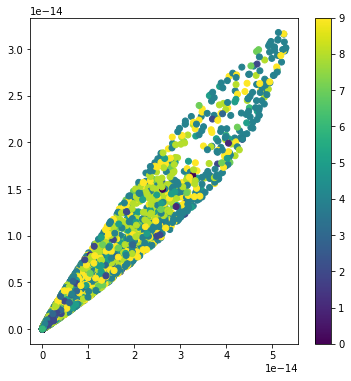

In [28]:
x_test_encoded = vae.predict(x_test, batch_size=32)

plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

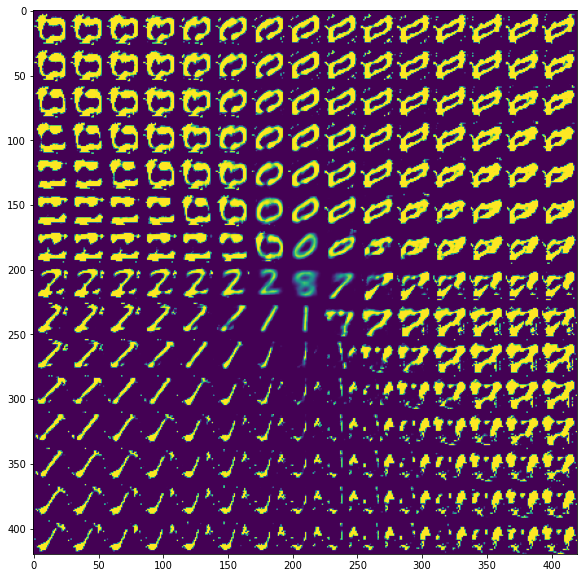

In [29]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()
